In [89]:
import charts

In [90]:
import importlib
importlib.reload(charts)

<module 'charts' from '/Users/victor/Dropbox/data/paternalAgeStudy/charts.py'>

In [120]:
LEFTISMPARTY = False #set to True to make Leftism based on party
LEFTISMWINGNESS = False #set to True to make Leftism based on wingness
df = pd.read_csv('cleaned.csv')
df['Father Birth Year'] = 2023 - (df['Paternal Age'] + df['Age'])
df['<35'] = df['Paternal Age'].apply(lambda x: 0 if x <= 35 else 1)
if (LEFTISMPARTY == True):
    df['Leftism'] = 0
    df.loc[df['Party'] == 'Democratic', 'Leftism'] = 1

if (LEFTISMWINGNESS == True):
    df['Leftism'] = 0
    df.loc[df['Wingness'] == 'Left-wing', 'Leftism'] = 1




In [121]:
df

,Party,Wingness,LGBT,BLM,Feminism,Paternal Age,Leftism,Age,Father Birth Year,<35
0,Independent,Left-wing,1,1,1,43,1,22.0,1958.0,1
1,Democratic,Left-wing,0,1,1,39,0,26.0,1958.0,1
2,Independent,Left-wing,1,1,1,26,1,40.0,1957.0,0
3,Independent,Centrist,0,0,0,27,0,71.0,1925.0,0
4,Democratic,Left-wing,1,1,1,27,1,21.0,1975.0,0
...,...,...,...,...,...,...,...,...,...,...
2375,Republican,Right-wing,1,0,1,26,0,26.0,1971.0,0
2376,Independent,Centrist,1,0,1,34,0,27.0,1962.0,0
2377,Republican,Right-wing,1,1,1,30,1,24.0,1969.0,0
2378,Republican,Right-wing,0,0,0,20,0,65.0,1938.0,0


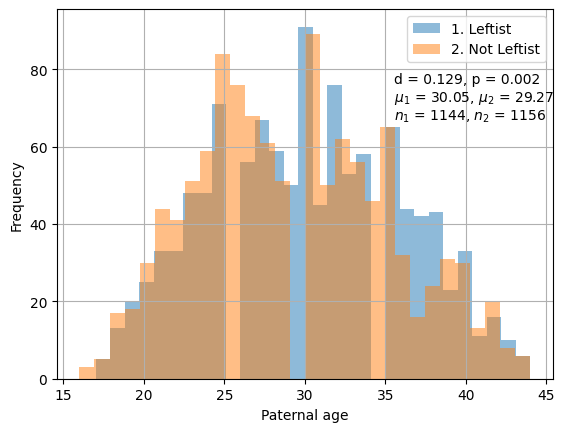

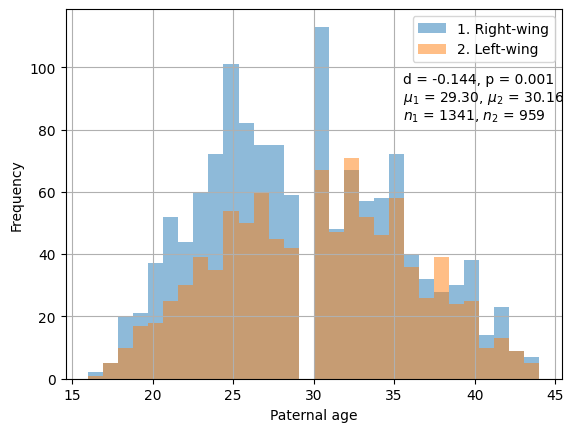

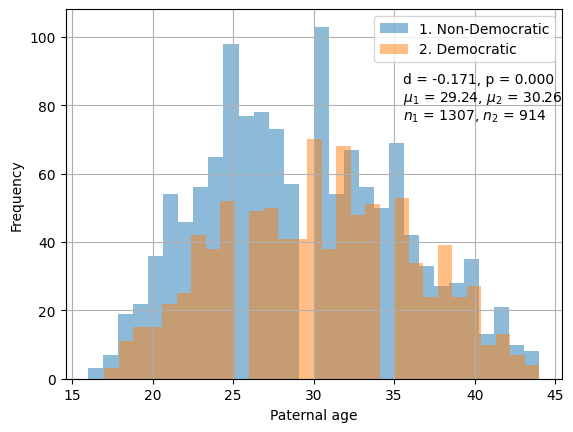

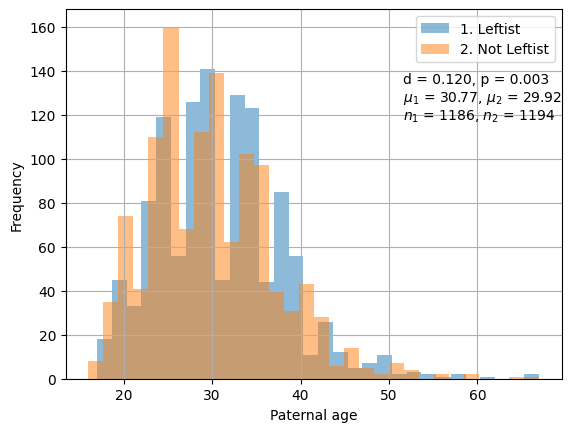

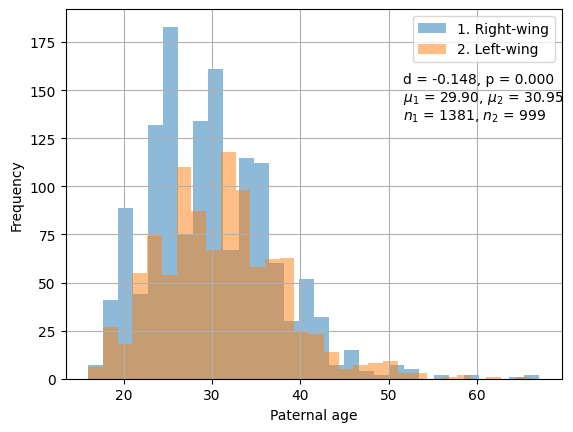

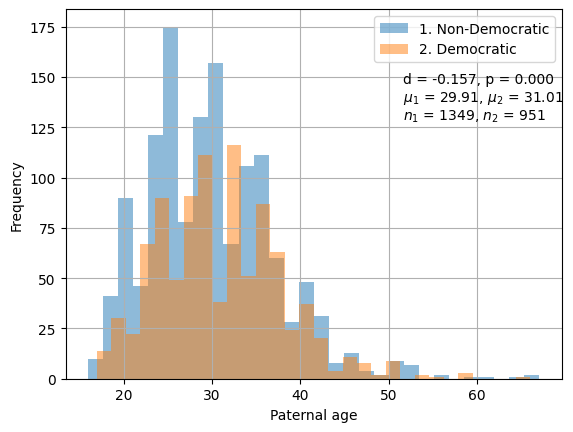

In [122]:
#With tails cut
df2 = df[ df['Paternal Age'] < 45]

charts.histograms(df2[df2['Leftism'] == 1]['Paternal Age'], df2[df2['Leftism'] == 0]['Paternal Age'], "Leftist", "Not Leftist", "Paternal age")
charts.histograms(df2[df2['Wingness'].isin(["Right-wing", "Centrist"]) ]['Paternal Age'], df2[df2['Wingness'].isin(["Left-wing"])]['Paternal Age'], "Right-wing", "Left-wing", "Paternal age")
charts.histograms(df2[df2['Party'].isin(["Republican", "Independent"]) ]['Paternal Age'], df2[df2['Party'].isin(["Democratic"])]['Paternal Age'], "Non-Democratic", "Democratic", "Paternal age")

#Without tails cut
df2 = df.copy()
charts.histograms(df2[df2['Leftism'] == 1]['Paternal Age'], df2[df2['Leftism'] == 0]['Paternal Age'], "Leftist", "Not Leftist", "Paternal age")
charts.histograms(df2[df2['Wingness'].isin(["Right-wing", "Centrist"]) ]['Paternal Age'], df2[df2['Wingness'].isin(["Left-wing"])]['Paternal Age'], "Right-wing", "Left-wing", "Paternal age")
charts.histograms(df2[df2['Party'].isin(["Republican", "Independent"]) ]['Paternal Age'], df2[df2['Party'].isin(["Democratic"])]['Paternal Age'], "Non-Democratic", "Democratic", "Paternal age")



/Users/victor/Dropbox/data/paternalAgeStudy/charts.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if exclude is not None:
/Users/victor/Dropbox/data/paternalAgeStudy/charts.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if exclude is not None:
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


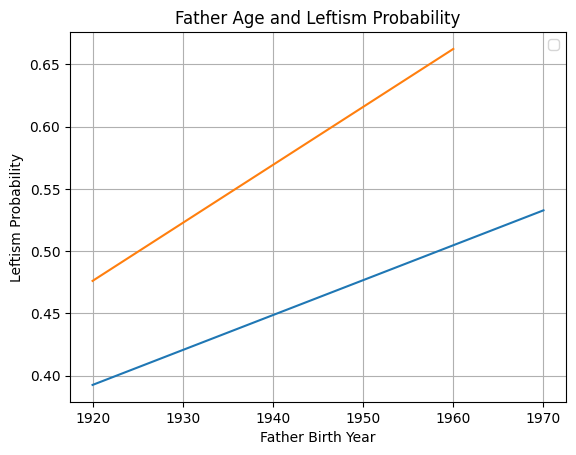

/var/folders/2w/sy40wmhs0zs6mfg2mnj_7qlh0000gn/T/ipykernel_40427/1294016959.py:10: RankWarning: Polyfit may be poorly conditioned
  charts.groupRchart2( (df4,df5) ,'Father Birth Year', 'Leftism', title='Leftism of Kids of >35 Fathers and <35 Fathers', names=('Father Birth Year', 'Leftism Probaility'), n=60, )
/opt/anaconda3/envs/DJANGO/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/envs/DJANGO/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/envs/DJANGO/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/victor/Dropbox/data/paternalAgeStudy/charts.py:171: RuntimeWarning: invalid value encountered in sqrt
  z = stats.norm.ppf(1-(1-0.95)/2)
/var/folders/2w/sy40wmhs0

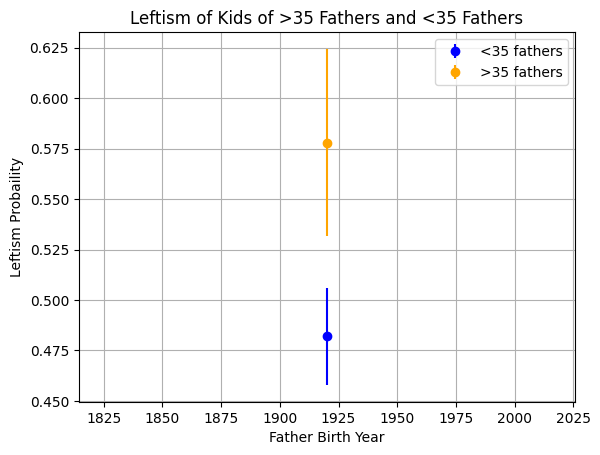

In [123]:
df2 = df[ df['Paternal Age'] <= 35]
df3 = df[ df['Paternal Age'] > 35]

charts.groupRchart2( (df2,df3) ,'Father Birth Year', 'Leftism', title='Father Age and Leftism Probability', names=('Father Birth Year', 'Leftism Probability'), explicit=False, n=10, exclude=[1900,1905,1915,1980,1910])

df4 = df2[ df2['Father Birth Year'] >= 1920 ]
df4 = df4[ df4['Father Birth Year'] < 1970  ]
df5 = df3[ df3['Father Birth Year'] >= 1920 ]
df5 = df5[ df5['Father Birth Year'] < 1970  ]
charts.groupRchart2( (df4,df5) ,'Father Birth Year', 'Leftism', title='Leftism of Kids of >35 Fathers and <35 Fathers', names=('Father Birth Year', 'Leftism Probaility'), n=60, )



In [124]:
model = charts.smf.logit(formula='Leftism ~ Q("Paternal Age") + Age', data=df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.681348
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Leftism   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.01701
Time:                        13:46:02   Log-Likelihood:                -1621.6
converged:                       True   LL-Null:                       -1649.7
Covariance Type:            nonrobust   LLR p-value:                 6.457e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4595      0.232      1.976      0.048       0.004       0.915
Q("Pater

In [125]:
model = charts.smf.logit(formula='Leftism ~ Q("<35") + Age', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.681198
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Leftism   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.01723
Time:                        13:46:03   Log-Likelihood:                -1621.3
converged:                       True   LL-Null:                       -1649.7
Covariance Type:            nonrobust   LLR p-value:                 4.514e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8112      0.134      6.061      0.000       0.549       1.074
Q("<35")       0.2394      0.